In [2]:
#https://medium.com/deep-math-machine-learning-ai/chapter-7-1-neural-network-from-scratch-in-python-b880b0ff5f7b
import numpy as np
from IPython.display import Image,display
import matplotlib.pyplot as plt

In [3]:
#Xor data
XORdata=np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
X=XORdata[:,0:2]
y=XORdata[:,-1]

In [4]:
def print_network(net):
    for i,layer in enumerate(net,1):
        print("Layer {} ".format(i))
        for j,neuron in enumerate(layer,1):
            print("neuron {} :".format(j),neuron)

In [5]:
def initialize_network():
    
    input_neurons=len(X[0])
    hidden_neurons=input_neurons+1
    output_neurons=2
    
    n_hidden_layers=1
    
    net=list()
    
    for h in range(n_hidden_layers):
        if h!=0:
            input_neurons=len(net[-1])
            
        hidden_layer = [ { 'weights': np.random.uniform(size=input_neurons)} for i in range(hidden_neurons) ]
        net.append(hidden_layer)
    
    output_layer = [ { 'weights': np.random.uniform(size=hidden_neurons)} for i in range(output_neurons)]
    net.append(output_layer)
    
    return net

In [6]:
net=initialize_network()
print_network(net)

Layer 1 
neuron 1 : {'weights': array([0.4835796 , 0.69398748])}
neuron 2 : {'weights': array([0.95976508, 0.21660728])}
neuron 3 : {'weights': array([0.14716997, 0.82200742])}
Layer 2 
neuron 1 : {'weights': array([0.66007719, 0.54029526, 0.76719089])}
neuron 2 : {'weights': array([0.6487347 , 0.90859397, 0.89654708])}


In [7]:
def activate_sigmoid(sum):
    return (1/(1+np.exp(-sum)))

In [8]:
def forward_propagation(net,input):
    row=input
    for layer in net:
        prev_input=np.array([])
        for neuron in layer:
            sum=neuron['weights'].T.dot(row)
            
            result=activate_sigmoid(sum)
            neuron['result']=result
            
            prev_input=np.append(prev_input,[result])
        row =prev_input
    
    return row

In [9]:
def sigmoidDerivative(output):
    return output*(1.0-output)

In [10]:
def back_propagation(net,row,expected):
     for i in reversed(range(len(net))):
            layer=net[i]
            errors=np.array([])
            if i==len(net)-1:
                results=[neuron['result'] for neuron in layer]
                errors = expected-np.array(results) 
            else:
                for j in range(len(layer)):
                    herror=0
                    nextlayer=net[i+1]
                    for neuron in nextlayer:
                        herror+=(neuron['weights'][j]*neuron['delta'])
                    errors=np.append(errors,[herror])
            
            for j in range(len(layer)):
                neuron=layer[j]
                neuron['delta']=errors[j]*sigmoidDerivative(neuron['result'])

In [11]:
def updateWeights(net,input,lrate):
    
    for i in range(len(net)):
        inputs = input
        if i!=0:
            inputs=[neuron['result'] for neuron in net[i-1]]

        for neuron in net[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]

In [12]:
def training(net, epochs,lrate,n_outputs):
    errors=[]
    for epoch in range(epochs):
        sum_error=0
        for i,row in enumerate(X):
            outputs=forward_propagation(net,row)
            
            expected=[0.0 for i in range(n_outputs)]
            expected[y[i]]=1
    
            sum_error+=sum([(expected[j]-outputs[j])**2 for j in range(len(expected))])
            back_propagation(net,row,expected)
            updateWeights(net,row,0.05)
        if epoch%10000 ==0:
            print('>epoch=%d,error=%.3f'%(epoch,sum_error))
            errors.append(sum_error)
    return errors

In [13]:
errors=training(net,100000, 0.05,2)

>epoch=0,error=2.716
>epoch=10000,error=0.761
>epoch=20000,error=0.072
>epoch=30000,error=0.037
>epoch=40000,error=0.025
>epoch=50000,error=0.019
>epoch=60000,error=0.015
>epoch=70000,error=0.012
>epoch=80000,error=0.011
>epoch=90000,error=0.009


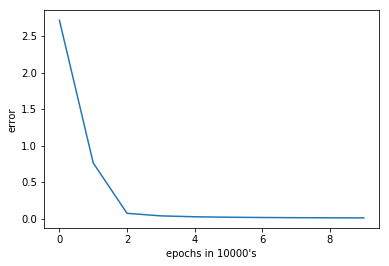

In [14]:
epochs=[0,1,2,3,4,5,6,7,8,9]
plt.plot(epochs,errors)
plt.xlabel("epochs in 10000's")
plt.ylabel('error')
plt.show()

In [15]:
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagation(net, row)
    return outputs

In [16]:
pred=predict(net,np.array([1,0])) #aynı olunca 0 farklı olunca 1 xor
output=np.argmax(pred)
print(output)

1


In [17]:
print_network(net)

Layer 1 
neuron 1 : {'weights': array([ 7.22726418, -4.52044975]), 'result': 0.9992740216898665, 'delta': 7.969704370993754e-05}
neuron 2 : {'weights': array([5.8925043 , 5.90991661]), 'result': 0.9972475409081227, 'delta': -1.4027695692125309e-08}
neuron 3 : {'weights': array([-4.52293471,  7.23418786]), 'result': 0.010740503511710738, 'delta': 7.939074067114888e-05}
Layer 2 
neuron 1 : {'weights': array([  9.60746845, -13.24980927,   9.60779195]), 'result': 0.0290388024206489, 'delta': 7.071818257228402e-05}
neuron 2 : {'weights': array([-9.6077207 , 13.25014871, -9.60804423]), 'result': 0.970963558117149, 'delta': -7.069952998778865e-05}
